In [ ]:
# Reyhan Suisanto
# 2301872980

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Import dataset, kemudian saya pisah menjadi x(feature) dan y(label) untuk train dan test

In [2]:
data = pd.read_csv('UAS_ML2021_DATASET01.csv')
data["Label"].replace({0:-1}, inplace=True)

x = data.drop("Label", axis=1)
y = data['Label']

x = np.array(x)
y = np.array(y)

Lalu saya menggunakan SVC dari library untuk mencari weight dan bias nya

In [3]:
svc = SVC(kernel = 'linear')
svc.fit(x, y)

print('Weight = ', svc.coef_)
print('Bias   = ', svc.intercept_)

Weight =  [[-1.43035116 -0.02982673]]
Bias   =  [-1.60751825]


Lalu code dibawah merupakan code dari SVM

In [4]:
def plot_svc_decision_function(svc, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Evaluate
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svc.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Untuk plot support vector
    if plot_support:
        ax.scatter(svc.support_vectors_[:, 0],
                   svc.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Terakhir saya melakukan print untuk mencari support vectornya

array([[-0.49786339,  1.84886877],
       [-0.45701287,  1.53946451],
       [-1.82041156, -0.10675079],
       [-1.87170722,  2.32769161]])

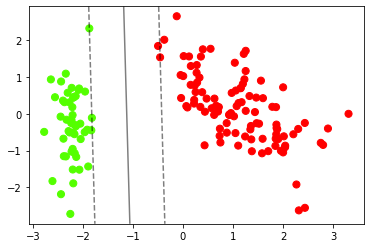

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='prism')
plot_svc_decision_function(svc);
svc.support_vectors_

Saya juga print gambar untuk tiap titik-titiknya seperti gambar diatas